In [1]:
import os
import pandas as pd
import tweepy
import random 
import numpy as np
import datetime
from datetime import date
import warnings
import requests
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO

# settings
pd.set_option('display.max_colwidth', None)

# time
today = date.today()
today_weekday = today.weekday()
now = datetime.datetime.now()
current_time = now.strftime("%H:%M:%S")
print("día de la semana hora local UTC =", today_weekday)
print("hoy es", today)
print("Hora actual en UTC =", current_time)

día de la semana hora local UTC = 6
hoy es 2022-09-18
Hora actual en UTC = 18:50:15


In [2]:
# environmental secrets when working locally
from dotenv import load_dotenv
try:
    load_dotenv()
    load_dotenv("../../../")
    print("envs loaded")
except:
    print("envs failed to load")
    pass

envs loaded


In [3]:
#USING GITHUB ENVS

# test
BG1_TWITTER_APIKEY= os.environ["BG1_TWITTER_APIKEY"]
BG1_TWITTER_APIKEYSECRET = os.environ["BG1_TWITTER_APIKEYSECRET"]

BG1_TWITTER_BEARERTOKEN = os.environ["BG1_TWITTER_BEARERTOKEN"]
BG1_TWITTER_ACCESSTOKEN = os.environ["BG1_TWITTER_ACCESSTOKEN"]
BG1_TWITTER_ACCESSTOKENSECRET = os.environ["BG1_TWITTER_ACCESSTOKENSECRET"]

# Authenticate to Twitter
auth = tweepy.OAuthHandler(BG1_TWITTER_APIKEY, BG1_TWITTER_APIKEYSECRET)
auth.set_access_token(BG1_TWITTER_ACCESSTOKEN, BG1_TWITTER_ACCESSTOKENSECRET)

# Create API object 
api = tweepy.API(auth)
api

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/timeseries-country-confirmed.csv")
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df_bo = df[df.Country=="Bolivia"]
df_bo

,Date,Cases,Cumulative_cases,Country
872,2022-08-01,1,1,Bolivia
873,2022-08-02,0,1,Bolivia
874,2022-08-03,2,3,Bolivia
875,2022-08-04,0,3,Bolivia
876,2022-08-05,0,3,Bolivia
877,2022-08-06,2,5,Bolivia
878,2022-08-07,0,5,Bolivia
879,2022-08-08,0,5,Bolivia
880,2022-08-09,0,5,Bolivia
881,2022-08-10,1,6,Bolivia


In [47]:
dff = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRvyPJmYjx64a0YbM_9GtUV76FoHNscuNiZA5BJZdzZx1bHuFBvFEZf6hVkan7KkeQD-E5FT5GBBpGH/pub?gid=0&single=true&output=csv", index_col=0)
dff.index = pd.to_datetime(dff.index)
dff

,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
Fecha,,,,,,,,,,,,,,,,,,
NaT,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados,Confirmados,Descartados
2022-08-14,NaN,6,NaN,6,15,30,NaN,NaN,NaN,3,NaN,NaN,NaN,1,NaN,5,NaN,3
2022-08-15,NaN,6,NaN,6,20,30,NaN,NaN,1,3,NaN,2,NaN,1,NaN,5,NaN,3
2022-08-16,NaN,6,NaN,6,26,30,NaN,NaN,1,3,NaN,2,NaN,1,NaN,5,NaN,3
2022-08-17,1,6,NaN,6,29,30,NaN,NaN,1,3,NaN,2,NaN,1,NaN,5,NaN,3
2022-08-18,1,6,NaN,6,35,30,NaN,NaN,1,3,NaN,2,NaN,1,NaN,5,NaN,3
2022-08-19,1,8,NaN,6,35,40,NaN,NaN,1,3,NaN,3,NaN,1,NaN,5,NaN,3
2022-08-20,1,9,2,6,38,59,NaN,NaN,1,3,NaN,3,NaN,1,NaN,5,NaN,3
2022-08-21,1,17,3,8,38,65,NaN,5,1,3,NaN,3,NaN,3,NaN,12,NaN,3


In [140]:
plt.style.use("ggplot")

2022-09-18T00:00:00.000000000


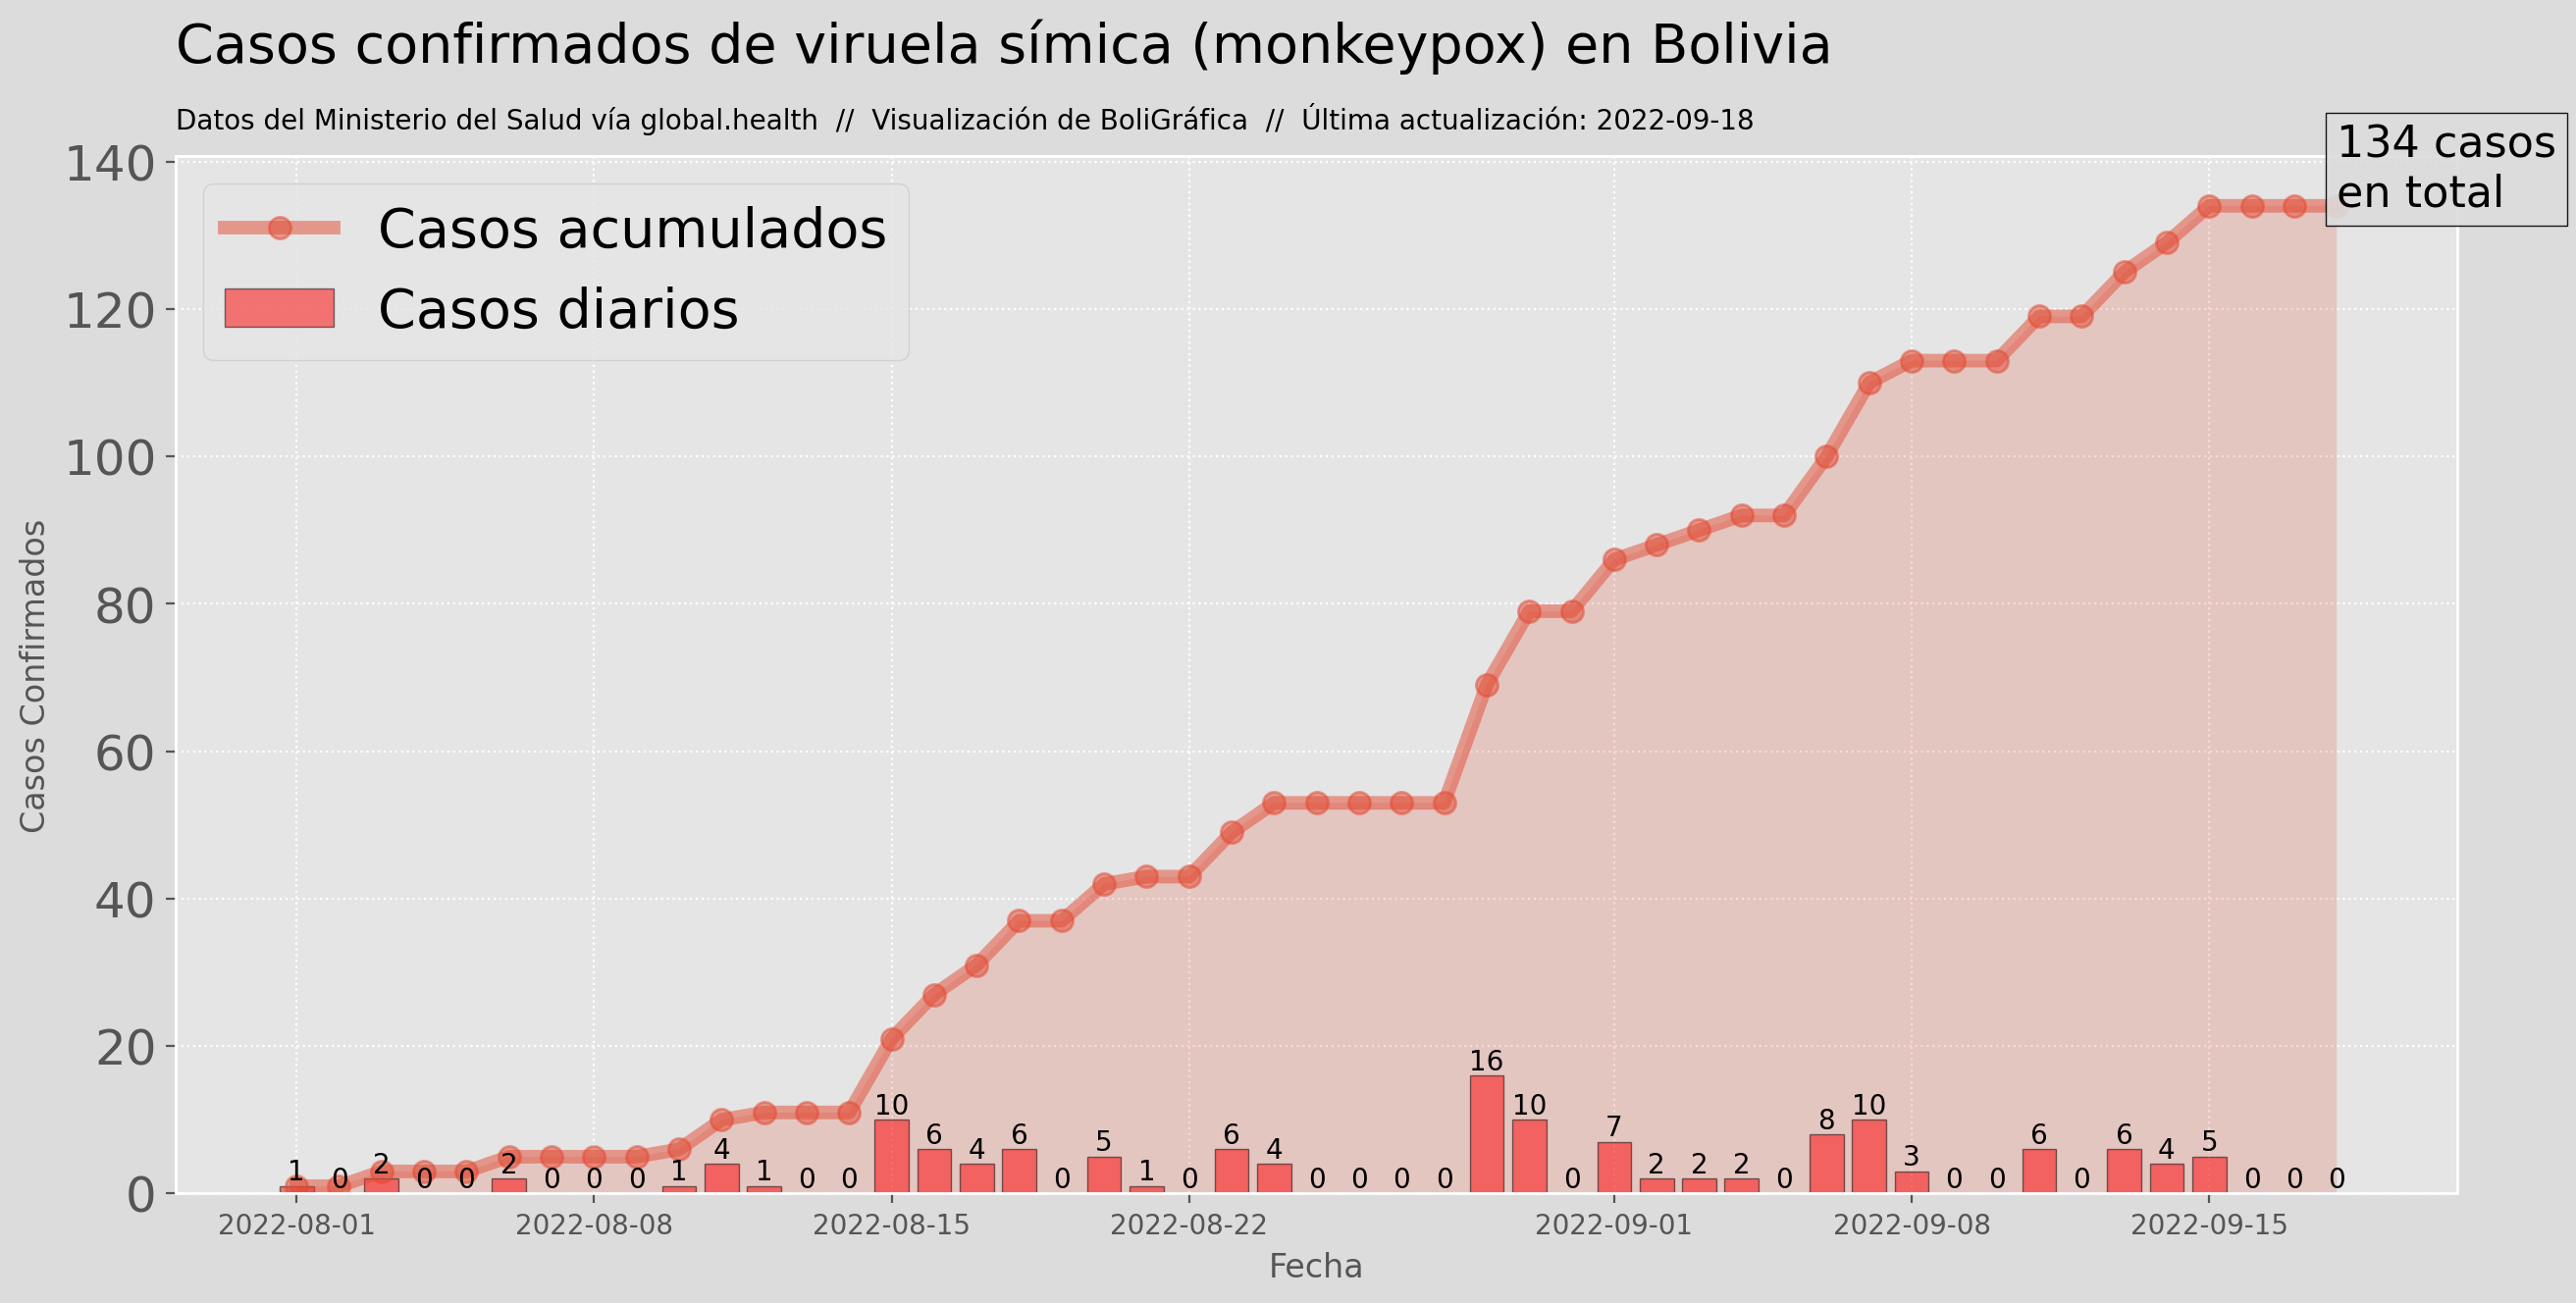

In [141]:
fig, axs = plt.subplots(1,1, figsize = (15, 7), dpi=200)
fig.suptitle("Casos confirmados de viruela símica (monkeypox) en Bolivia", fontsize=20, ha="left", x=0.125)

# summary
latest_cumsum = df_bo.Cumulative_cases.values[-1]
latest_date = df_bo.Date.values[-1]

# acumulados
axs.plot(df_bo.Date, df_bo.Cumulative_cases, label="Casos acumulados", alpha=.5, lw=5, marker="o", ms=8)
axs.fill_between(df_bo.Date, df_bo.Cumulative_cases, alpha=.2)
print(latest_date)
axs.annotate(text = f"{str(latest_cumsum)} casos\nen total", xy = (latest_date, latest_cumsum),
            bbox={"alpha": .9, "color": "gainsboro", "ec":"black"}, fontsize = 16)

# diarios
bar = axs.bar(df_bo.Date, df_bo.Cases, label = "Casos diarios", color="r", alpha=.5, ec="black")
axs.bar_label(bar)

# final fig params
fig.text(x=.125, y = .9, s="Datos del Ministerio del Salud vía global.health  //  Visualización de BoliGráfica" + f"  //  Última actualización: {str(latest_date)[:10]}", ha='left')
fig.set_facecolor("gainsboro")
axs.tick_params("y", labelsize=18)
axs.set_ylabel("Casos Confirmados")
axs.set_xlabel("Fecha")
axs.grid(lw=.8, ls=":")
axs.legend(fontsize = 20)

fig.savefig("nacional", bbox_inches="tight")

pass

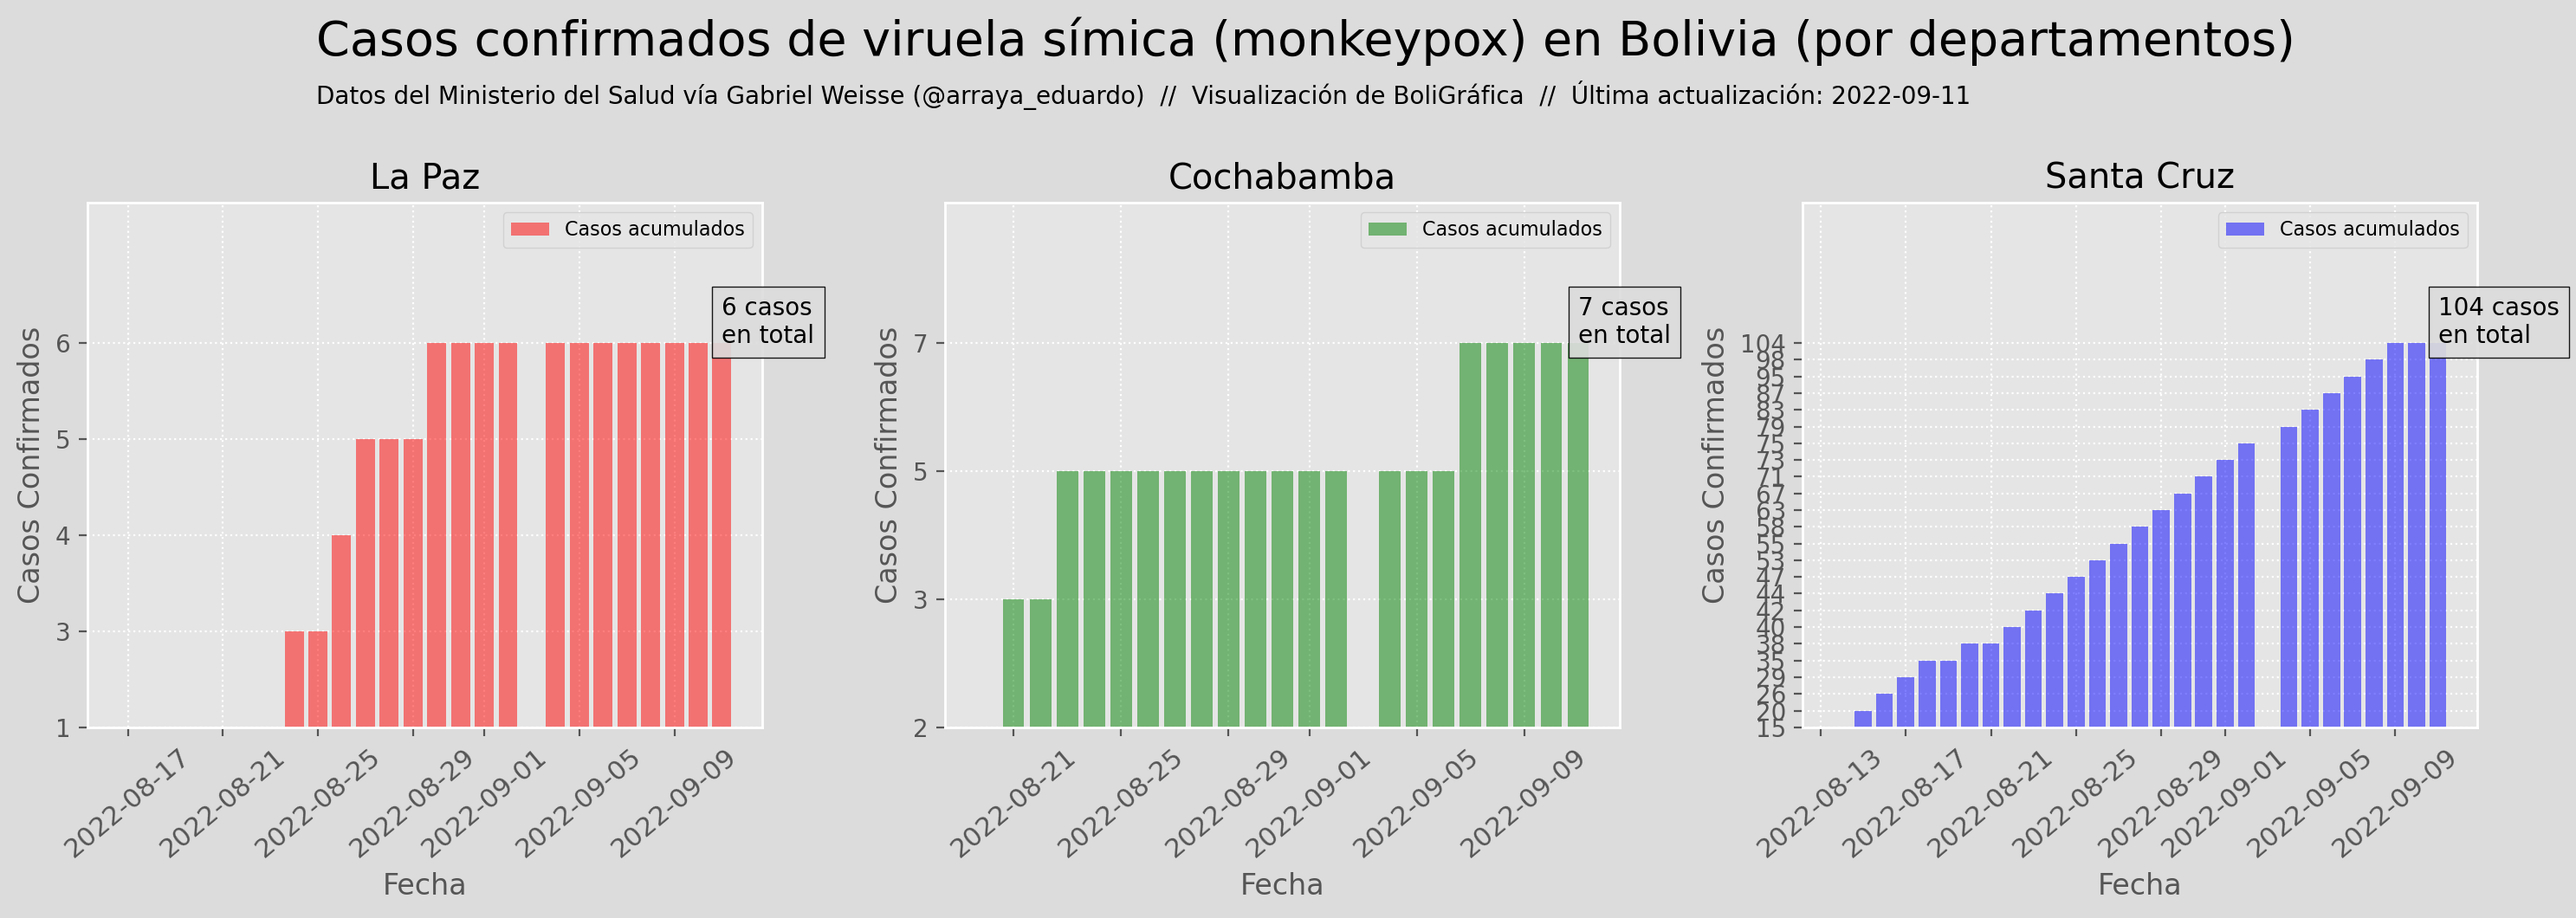

In [142]:
fig, axs = plt.subplots(1,3, figsize = (15, 5), dpi=200)
axs = axs.flatten()
fig.suptitle("Casos confirmados de viruela símica (monkeypox) en Bolivia (por departamentos)", fontsize=20, ha="left", x=0.125, y=1.05)
latest_date = dff.index.values[-1]

# display(dff)
# summary

for i,j in enumerate(["La Paz", "Cochabamba", "Santa Cruz"]):#, "Oruro", "Potosi", "Tarija", "Chuquisaca", "Beni", "Pando"]):
    dfd = dff.iloc[1:,:][j].dropna()
    # dfd_diff = dff.iloc[1:,:]#.diff()#[j].dropna()
    dfd.index = pd.to_datetime(dfd.index)
    # display(dfd)    

    axs[i].set_title(j)
    try:
        latest_cumsum = dfd[-1]

        # acumulados
        axs[i].bar(dfd.index, dfd.values, label="Casos acumulados", alpha=.5, color=["r", "g", "b"][i])
        # axs[i].fill_between(dfd.index, dfd.values, alpha=.2)
        axs[i].annotate(text = f"{str(latest_cumsum)} casos\nen total", xy = (latest_date, latest_cumsum),
                    bbox={"alpha": .9, "color": "gainsboro", "ec":"black"}, fontsize = 10)

        # diarios
        # display(dfd)
        # bar = axs[i].bar(dfd.index, dfd.values.diff(), label = "Casos diarios", color="r", alpha=.5, ec="black")
        # axs[i].bar_label(bar)

        # final fig params
        axs[i].tick_params("x", labelsize=11, rotation=40)
        axs[i].set_ylim(0, axs[i].get_ylim()[1]*1.3)
        axs[i].set_ylabel("Casos Confirmados")
        axs[i].set_xlabel("Fecha")
        axs[i].grid(lw=.8, ls=":")
        axs[i].legend(fontsize = 8)
    except:
        pass

fig.text(x=.125, y = .95, s="Datos del Ministerio del Salud vía Gabriel Weisse (@arraya_eduardo)  //  Visualización de BoliGráfica" + f"  //  Última actualización: {str(latest_date)[:10]}", ha='left')
fig.set_facecolor("gainsboro")
fig.tight_layout()
fig.savefig("departamental", bbox_inches="tight")

pass

In [138]:
def post_monkeypox_national(img_filename):

    # img path & upload media
    img_path = f"{img_filename}.png"

    #get info
    latest_cumsum = df_bo.Cumulative_cases.values[-1]
    latest_date = df_bo.Date.values[-1]

    # MESSAGE 
    MESSAGE = f"""
Actualización {str(latest_date)[:10]}:

Casos confirmados de viruela símica (monkeypox) en Bolivia

(Fuente: Ministerio de Salud via global.health), Eduardo Arraya
"""
    print(MESSAGE)


    # TWEET
    media_id = api.media_upload(img_path).media_id
    api.update_status(status = MESSAGE, media_ids = [media_id])
    

    print('TWEET SUCCESFUL!! ')
    return


post_monkeypox_national(random.choice(["departamental"]))
post_monkeypox_national(random.choice(["nacional"]))


Actualización 2022-09-18:

Casos confirmados de viruela símica (monkeypox) en Bolivia

(Fuente: Ministerio de Salud via global.health), Eduardo Arraya

TWEET SUCCESFUL!! 

Actualización 2022-09-18:

Casos confirmados de viruela símica (monkeypox) en Bolivia

(Fuente: Ministerio de Salud via global.health), Eduardo Arraya

TWEET SUCCESFUL!! 
